In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import KMeans,MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [4]:
#reading form json file and show df
df=pd.read_json('department-of-justice-combined.json',lines=True)

In [6]:
df.head(20)

,id,title,contents,date,topics,components
0,None,Convicted Bomb Plotter Sentenced to 30 Years,"PORTLAND, Oregon. – Mohamed Osman Mohamud, 23,...",2014-10-01T00:00:00-04:00,[],[National Security Division (NSD)]
1,12-919,$1 Million in Restitution Payments Announced t...,WASHINGTON – North Carolina’s Waccamaw River...,2012-07-25T00:00:00-04:00,[],[Environment and Natural Resources Division]
2,11-1002,$1 Million Settlement Reached for Natural Reso...,BOSTON– A $1-million settlement has been...,2011-08-03T00:00:00-04:00,[],[Environment and Natural Resources Division]
3,10-015,10 Las Vegas Men Indicted \r\nfor Falsifying V...,WASHINGTON—A federal grand jury in Las Vegas...,2010-01-08T00:00:00-05:00,[],[Environment and Natural Resources Division]
4,18-898,$100 Million Settlement Will Speed Cleanup Wor...,"The U.S. Department of Justice, the U.S. Envir...",2018-07-09T00:00:00-04:00,[Environment],[Environment and Natural Resources Division]
5,None,105 Individuals Indicted for Violating the RIC...,A nine count federal indictment was unsealed t...,2015-07-22T00:00:00-04:00,[],[USAO - Puerto Rico]
6,14-032,12th Former Officer at Roxbury Correctional In...,"Michael Morgan, formerly an officer at Roxbury...",2014-01-10T00:00:00-05:00,[],"[Civil Rights Division, Civil Rights - Crimina..."
7,14-1412,14 Indicted in Connection with New England Com...,A 131-count criminal indictment was unsealed t...,2014-12-17T00:00:00-05:00,[Consumer Protection],[Civil Division]
8,14-849,14 Individuals Charged with Trafficking Identi...,Fourteen individuals were charged in three ...,2014-08-12T00:00:00-04:00,[],[Criminal Division]
9,15-089,"15th Member of Washington, D.C.-Based Identity...",Defendant Admits To Targeting Parents Of Hospi...,2015-01-23T00:00:00-05:00,[],[Criminal Division]


In [15]:
df['contents'].count()

13087

In [19]:
df['contents']

0        PORTLAND, Oregon. – Mohamed Osman Mohamud, 23,...
1          WASHINGTON – North Carolina’s Waccamaw River...
2              BOSTON– A $1-million settlement has been...
3          WASHINGTON—A federal grand jury in Las Vegas...
4        The U.S. Department of Justice, the U.S. Envir...
                               ...                        
13082    The Department of Justice and the U.S. Environ...
13083      The Justice Department announced that Zarein...
13084    Subsidiary Agrees to Plead Guilty to Violating...
13085    ZTE Corporation has agreed to enter a guilty p...
13086    ZTE Corporation pleaded guilty today to conspi...
Name: contents, Length: 13087, dtype: object

In [26]:
tfidf= TfidfVectorizer(
    stop_words = 'english',
    input='content',
    encoding='utf-8',
    decode_error='strict',
    strip_accents=None,
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    analyzer='word',
    token_pattern='(?u)\\b\\w\\w+\\b',
    ngram_range=(1, 1),
    max_df=0.95,
    min_df=0.2,
    max_features=8000,
    vocabulary=None,
    binary=False,
    norm='l2',
    use_idf=True,
    smooth_idf=True,
    sublinear_tf=False,
)


In [28]:
text= tfidf.fit_transform(df['contents'])

In [34]:
print(text.toarray())

[[0.04425984 0.05655374 0.2230746  ... 0.         0.         0.03879485]
 [0.12598777 0.         0.         ... 0.07017623 0.         0.05521571]
 [0.21206899 0.         0.         ... 0.07874945 0.         0.12392251]
 ...
 [0.         0.         0.         ... 0.04349003 0.10089164 0.06843721]
 [0.08802413 0.         0.         ... 0.         0.05687205 0.01928884]
 [0.13962006 0.         0.         ... 0.         0.09020798 0.        ]]


Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Wall time: 52min 58s


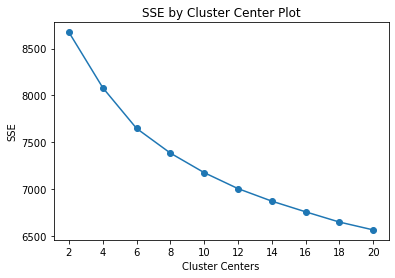

In [61]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(KMeans(init='k-means++', n_clusters=k, n_init=10,max_iter=300,tol=0.0001,precompute_distances='auto',verbose=0,copy_x=True, n_jobs=None,algorithm='auto').fit(data).inertia_)
        print('Fit {} clusters'.format(k))
    
    
    
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')

%time find_optimal_clusters(text, 20)


In [62]:

%time clusters =KMeans(init='k-means++', n_clusters=14, n_init=10,max_iter=300,tol=0.0001,precompute_distances='auto',verbose=0,copy_x=True, n_jobs=None,algorithm='auto').fit_predict(text)


Wall time: 3min 42s


Wall time: 14.2 s


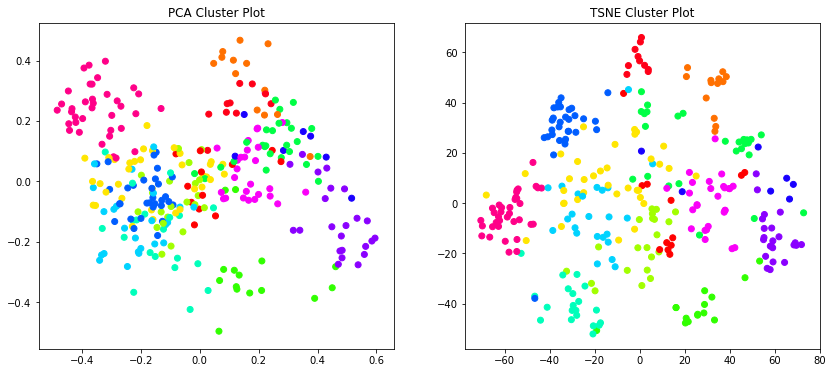

In [63]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
%time plot_tsne_pca(text, clusters)

In [66]:
len(set(clusters))

14

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Wall time: 1.06 s


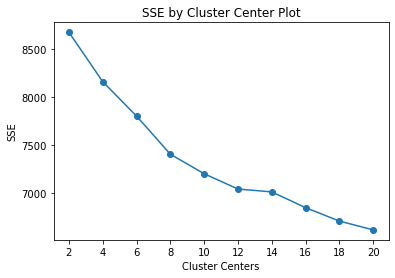

In [67]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
%time find_optimal_clusters(text, 20)


In [68]:
%time clusters = MiniBatchKMeans(n_clusters=14, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)


Wall time: 138 ms


Wall time: 12.9 s


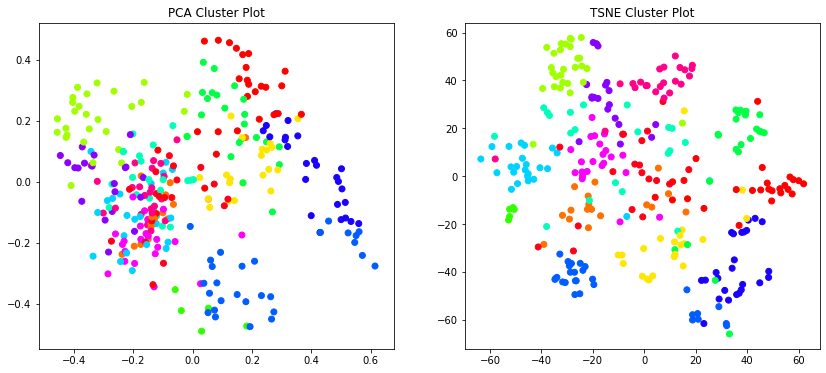

In [69]:
   def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
%time plot_tsne_pca(text, clusters)

In [70]:
#TO GET THE TOP NYMBER OF TEARMS IN EACH CLUSTER 
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)


Cluster 0
fraud,justice,services,civil,act,department,false,government,states,united

Cluster 1
office,assistant,new,states,united,district,attorney,national,fbi,security

Cluster 2
state,new,public,crime,enforcement,general,attorney,department,justice,law

Cluster 3
fbi,million,attorney,district,scheme,criminal,office,force,services,fraud

Cluster 4
jury,count,defendant,fbi,maximum,attorney,charges,civil,rights,indictment

Cluster 5
states,defendants,division,government,order,justice,federal,court,business,department

Cluster 6
fraud,guilty,department,investigation,pay,million,company,sentenced,conspiracy,criminal

Cluster 7
district,fraud,count,criminal,conspiracy,attorney,charged,defendants,charges,indictment

Cluster 8
federal,said,district,law,division,justice,attorney,department,civil,rights

Cluster 9
ensure,said,www,gov,justice,act,agreement,civil,rights,department

Cluster 10
000,scheme,attorney,plea,district,fraud,pleaded,criminal,guilty,admitted

Cluster 11
assistant,depart

# EVALUATION 

In [87]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer


In [90]:
%time model=KMeans(init='k-means++', n_clusters=14, n_init=10,max_iter=300,tol=0.0001,precompute_distances='auto',verbose=0,copy_x=True, n_jobs=None,algorithm='auto')


Wall time: 0 ns


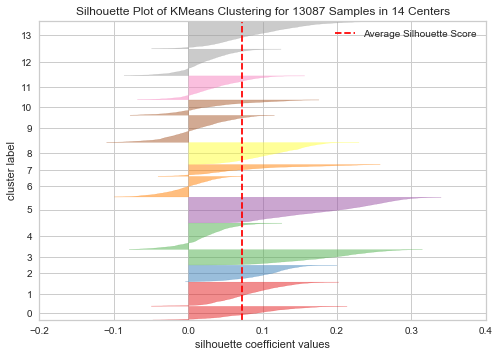

In [89]:
visualizer = SilhouetteVisualizer(model)

visualizer.fit(text)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data


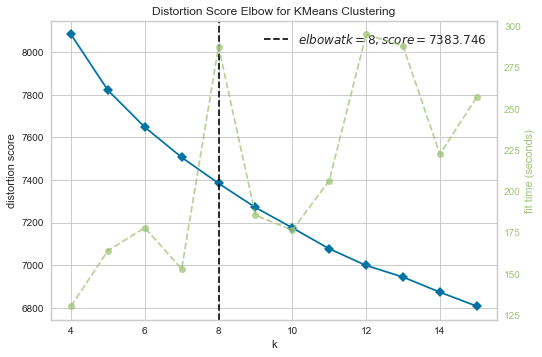

In [92]:
# Instantiate the clustering model and visualizer
#computes the sum of squared distances from each point to its assigned center.
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,16))

visualizer.fit(text)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

The KElbowVisualizer also displays the amount of time to fit the model per  K , which can be hidden by setting timings=False. In the following example, we'll use the calinski_harabaz score and hide the time to fit the model.

c:\users\waeal\appdata\local\programs\python\python37\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
c:\users\waeal\appdata\local\programs\python\python37\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
c:\users\waeal\appdata\local\programs\python\python37\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


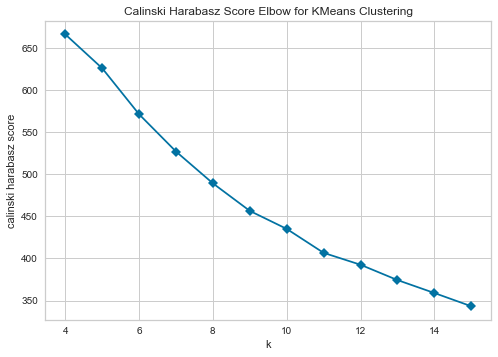

In [97]:
# Instantiate the clustering model and visualizer 
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,16), metric='calinski_harabasz', timings=False)

visualizer.fit(text.todense())    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data


In [108]:
dtale.show(df,ignore_duplicate=True)